In [1]:
import os
import cv2
import glob
import json
import tqdm
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.transform import Slerp, Rotation
import trimesh
import torch

In [2]:
exp_name = 'HZJ0310_45'
test_original_path = os.path.join('./data2', exp_name, 'transforms_train.json')
json_file = 'transforms_train.json' if os.path.isfile(test_original_path) else 'transforms_test.json'
pose_file = 'pose.npy'
pose_path = os.path.join('./data2', exp_name, 'train', pose_file)
data_path = os.path.join('./data2', exp_name, json_file)
fp = open(data_path, 'r')
data = json.load(fp)
fp.close()
frames = data['frames']

In [5]:
np_pose = np.load(pose_path)

locs = np_pose[:, :3, -1]
radius = []
for i in range(len(locs)):
    r = np.sqrt(locs[0]**2 + locs[1]**2 + locs[2]**2)
    radius.append(r)
print(f"Mean radius: {np.mean(radius):.4f}")

Mean radius: 0.5402


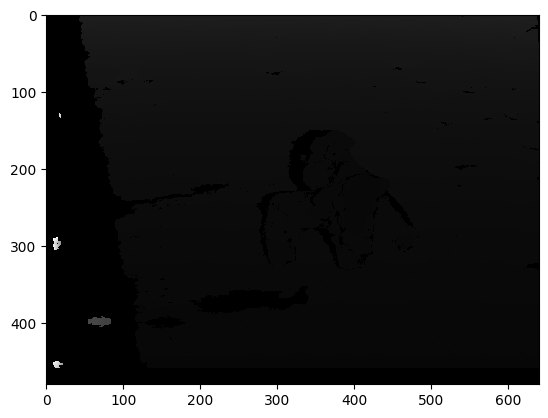

In [11]:
for f in frames:
    # depth_path = os.path.join('./data', exp_name, f['file_path'][:-4] + "_depth.npy")
    depth_path = os.path.join('./data2', exp_name, f['file_path'][:-4] + "_depth.npy")
    depth_np = None
    if os.path.exists(depth_path):
        depth_np = np.load(depth_path)
        plt.imshow(depth_np, cmap='gray', interpolation='nearest')
        # plt.show()

plt.show()

In [15]:
depth_np[depth_np>3] = 3

In [16]:
print(np.argmax(depth_np))

82577


In [5]:
for f in frames:
    depth_path = os.path.join('./data', exp_name, f['file_path'][:-4] + "_depth.png")
    depth_np = None
    if os.path.exists(depth_path):
        depth_np = plt.imread(depth_path)
        plt.imshow(depth_np, cmap='gray', interpolation='nearest')
        plt.show()

In [ ]:
data_path = os.path.join('./data', 'output_monodepth')
output_path = os.path.join('./data', 'DPTDepth')
max_depth = 15.0
for i in range(159):
    fig_path = os.path.join(data_path, f"img_{i:03d}.png")
    depth_img = plt.imread(fig_path)
    depth_img[depth_img<1.0/max_depth] = 1.0/max_depth
    depth_img = np.reciprocal(depth_img)
    depth_img[depth_img > max_depth] = 0
    depth_img = depth_img/(6*1.2)
    plt.imshow(depth_img, cmap='hot', interpolation='nearest')
    os.makedirs(output_path, exist_ok=True)
    np.save(os.path.join(output_path, f"img_{i:03d}_depth.npy"), depth_img)
    # plt.show()
    # print(fig_path)

In [ ]:
data_path = os.path.join('./data', 'outputd_depth')
for i in range(1, 15):
    fig_path = os.path.join(data_path, f"ngp_ep0100_{i:04d}_depth.png")
    depth_img = plt.imread(fig_path)
    plt.show()

In [ ]:
workspace = '/home/chow/RoboNGP/HZWorkspace'
wexp_name = 'HZ0307_img_online2'

wval_path = os.path.join(workspace, wexp_name, 'validation')
idx = 1
ep = 150
wdep_name = f'ngp_ep{ep:04d}_{idx:04d}_depth.png'
wdep_path = os.path.join(wval_path, wdep_name)


In [ ]:
wdep = plt.imread(wdep_path)

In [ ]:
H = 480
W = 640
window = 10
int(H/2-window)
mean_dpt = np.mean(depth_img[int(H/2-window):int(H/2+window), int(W/2-window):int(W/2+window)])
mean_w = np.mean(wdep[int(H/2-window):int(H/2+window), int(W/2-window):int(W/2+window)])
print(mean_dpt/mean_w)
print((0.92 / 0.55))